In [1]:
import os
import sys
sys.path.append("/home/pervinco/BKAI-IGH-NeoPolyp")

import cv2
import copy
import yaml
import random
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt

from tqdm import tqdm
from glob import glob

from data.data_preprocess import encode_mask

In [2]:
with open("/home/pervinco/BKAI-IGH-NeoPolyp/config.yaml", "r") as f:
    config = yaml.safe_load(f)

In [3]:
data_dir = config["data_dir"]
image_dir = f"{data_dir}/train"
mask_dir = f"{data_dir}/train_gt"

image_files = sorted(glob(f"{image_dir}/*"))
mask_files = sorted(glob(f"{mask_dir}/*"))

In [4]:
def mixup(foreground_image, background_image, alpha):
    image1, image2 = copy.deepcopy(foreground_image), copy.deepcopy(background_image)

    height, width = image1.shape[:2]
    background_transform = A.Compose([A.RandomRotate90(p=0.5),
                                      A.VerticalFlip(p=0.3),
                                      A.HorizontalFlip(p=0.3),
                                      A.RandomBrightnessContrast(p=0.6),
                                      A.Resize(height=height, width=width, p=1)])
    
    transformed = background_transform(image=image2)
    transformed_image = transformed["image"]

    mixed_image = cv2.addWeighted(image1, alpha, transformed_image, 1 - alpha, 0) 
    mixed_image = cv2.cvtColor(mixed_image, cv2.COLOR_BGR2RGB)   
    
    return mixed_image

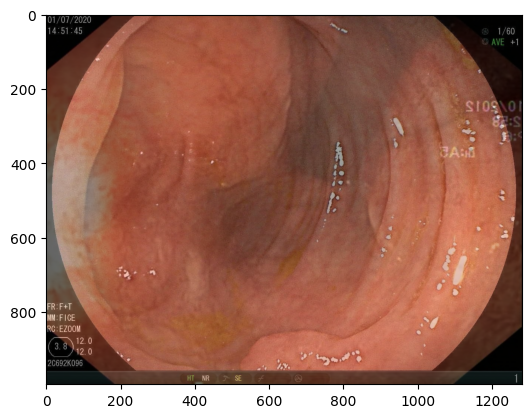

In [14]:
background_dir = "/home/pervinco/Datasets/background/train/1_ulcerative_colitis"
background_files = sorted(glob(f"{background_dir}/*"))

for image_file, mask_file in zip(image_files, mask_files):
    image = cv2.imread(image_file)
    mask = cv2.imread(mask_file)

    idx = random.randint(0, len(background_files) - 1)
    background_image = cv2.imread(background_files[idx])

    result = mixup(image, background_image, 0.6)
    plt.imshow(result)

    break